In [21]:
import os

from IPython.display import clear_output

import numpy as np
import tensorflow as tf
import control as ct
from scipy.optimize import minimize
from scipy.signal import freqs

# Graphics and plotting.
import mediapy as media
import matplotlib.pyplot as plt
# Configure MuJoCo to use the EGL rendering backend (requires GPU)
#os.environ['MUJOCO_GL'] = "egl"
os.environ['MUJOCO_GL'] = "glfw" #for mac
try:
  import mujoco
except Exception as e:
  raise e from RuntimeError("Something went wrong during import")
# More legible printing from numpy.
np.set_printoptions(precision=3, suppress=True, linewidth=100)

""

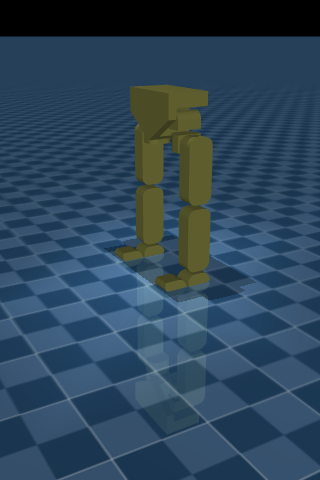

In [22]:
model = mujoco.MjModel.from_xml_path('bipede.xml')
data = mujoco.MjData(model)

ctx = mujoco.GLContext(1000, 1000)
ctx.make_current()

renderer = mujoco.Renderer(model, 480,)

mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

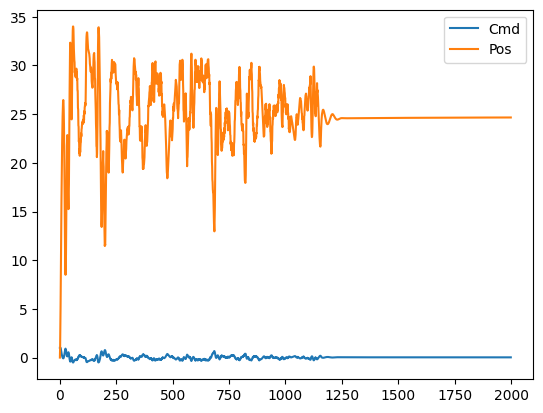

In [162]:
##PID

def motor_control(data, ref_pos, integral):
    cmd = np.zeros(12)
    state = 180*data.qpos[7:]/np.pi
    vel = data.qvel[6:]
    erreur = state - ref_pos
    integral = np.clip(integral + erreur, -10, 10)
    cmd = np.clip(-5.5*erreur - 0.2*vel - 0.05*integral, -100, 100)
    return cmd, integral


def plot(model, data, duration = 2, fps = 25):
    clear_output(wait=True)
    Cmd =[]
    Pos = []
    # Simulate and display video.
    frames = []
    mujoco.mj_resetData(model, data)  # Reset state and time.
    mujoco.mj_forward(model, data)
    integral = np.zeros(12)
    ref_pos = 25*np.ones(12)
    while data.time < duration:
      data.ctrl, integral = motor_control(data, ref_pos, integral)
      Cmd.append(0.01*data.ctrl[-5])
      Pos.append(180*data.qpos[-5]/np.pi)
      mujoco.mj_step(model, data)
      if len(frames) < data.time * fps:
        renderer.update_scene(data)
        pixels = renderer.render()
        frames.append(pixels)
    media.show_video(frames, fps= fps)
    plt.plot(Cmd)
    plt.plot(Pos)
    plt.legend(["Cmd", "Pos"])
    plt.show()


plot(model, data, duration=10, fps=25)

0.0
0.14725949407421565
0.40436751023139605
0.746972164785745
1.1568349545831549
1.617722819267316
2.1155743270626037
2.6356599922226667
3.1636702406063564
3.68715398765939
4.195120016358025
4.678022006623835
5.127825524371197
5.537973228891128
5.900942624043761
6.208845730658932
6.464580304809929
6.672575891601045
6.836718816671056
6.959882235652309
7.045427273130848
7.096588058168934
7.115428349987411
7.104101384661847
7.0644238633543655
6.9980314585019645
6.906723707353228
6.792460030564189
6.656282881689062
6.498568965181386
6.321382294465941
6.125767051299683
5.9158646851276115
5.68121256429174
5.431134824878573
5.172668797918252
4.925595019824692
4.702612439437562
4.519958588306646
4.377656004686895
4.288035425989409
4.255551464829329
4.294416143729052
4.374272457675601
4.516077864810444
4.66295072167013
4.855378715712576
5.012998511343682
5.186831232496301
5.2946102048007635
5.382586464435415
5.386769658349297
5.374443215258856
5.275184683785077
5.180045879288399
5.0022454097106

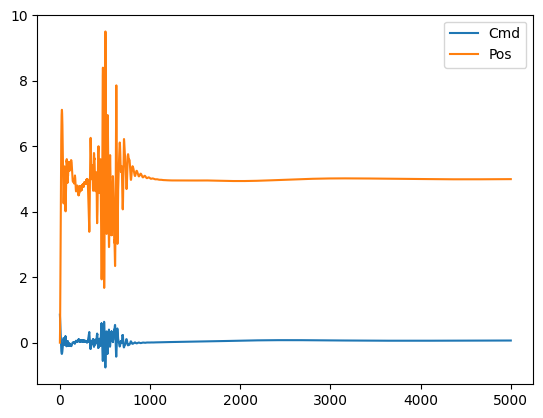

In [63]:
# Copyright (c) 2024 Louis Jouret
# 
# This software is released under the MIT License.
# https://opensource.org/licenses/MIT

